# Exploration

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/andreaaraldo/machine-learning-for-networks/blob/master/01.introduction/01.exploration.ipynb)



We use a the dataset of QoE prediction from [Requet dataset](https://github.com/Wimnet/RequetDataSet): Requet: Real-Time QoE Detection for Encrypted YouTube Traffic (preprocessed by me).




Figures from [1]:

![alt text](https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/01.introduction/img/sys-diagram.png)


![alt text](https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/01.introduction/img/experimental.png)


Load libraries


In [0]:
import pandas as pd # For dataframes (tables)
import numpy as np # For numerical operations
import math 
import matplotlib.pyplot as plt # For plots
import os # To import external python files
import sys# To import external python files

from pandas.plotting import scatter_matrix


Load the dataset previously preprocessed.



In [0]:
! wget https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/processed_datasets/requet/df.A_1.csv

--2020-04-13 09:19:13--  https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/processed_datasets/requet/df.A_1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1981459 (1.9M) [text/plain]
Saving to: ‘df.A_1.csv.1’

df.A_1.csv.1        100%[===================>]   1.89M  9.52MB/s    in 0.2s    

2020-04-13 09:19:14 (9.52 MB/s) - ‘df.A_1.csv.1’ saved [1981459/1981459]



In [0]:
mydatasets_folder = "/home/araldo/datasets"
df = pd.read_csv('df.A_1.csv')

In [0]:
df.head(n=11)

RelativeTime  PacketsSent  PacketsReceived  BytesSent  BytesReceived  \
0            0.4           14               14       5351          12894   
1            6.1           29               57       2372          79344   
2            2.2           18               21       2967          21708   
3            5.8            7               39        625          52973   
4            0.1           18               20       2320          13466   
5            1.2           21               23       5619          14835   
6            1.5            8               15        637          17127   
7            0.4           32               33       2980          28924   
8            7.3           16               23       1056          34178   
9            0.8            8               12       3813          11425   
10           2.9            9               13       1045          10748   

            IPSrc0          IPDst0 Protocol0  PacketsSent0  PacketsReceived0  \
0    192.168.1.190   173.194.55.23         0             0                 0   
1    192.168.1.190   173.194.55.23      QUIC            29                57   
2    192.168.1.190  74.125.155.199         0             0                 0   
3    192.168.1.190  74.125.155.199      QUIC             4                36   
4    192.168.1.190  173.194.54.236         0             0                 0   
5    192.168.1.190  173.194.54.236         0             0                 0   
6    192.168.1.190  173.194.54.236         0             0                 0   
7    192.168.1.190  74.125.155.201         0             0                 0   
8    192.168.1.190  74.125.155.201       TCP            16                23   
9    192.168.1.190  172.217.135.40         0             0                 0   
10   192.168.1.190  172.217.135.40         0             0                 0   

        ...        CollectData      EpochTime      StartTime PlaybackProgress  \
0       ...                  0              0  1520324862555            0.000   
1       ...                  0  1520324868397  1520324862555            0.008   
2       ...                  0              0  1521147316421            0.000   
3       ...                  0  1521147321127  1521147316421            0.007   
4       ...                  0              0  1520279002790            0.000   
5       ...                  0              0  1520279002790            0.000   
6       ...                  0              0  1520279002790            0.000   
7       ...                  0              0  1516218790859            0.000   
8       ...                  0  1516218797937  1516218790859            0.004   
9       ...                  0              0  1521736937485            0.000   
10      ...                  0              0  1521736937485            0.000   

     Length  BufferHealth  BufferProgress  BufferValid  KBytesReceived  \
0   861.841         0.000        0.000000           -1          12.894   
1   861.841         4.454        0.005177         true          79.344   
2   817.841         0.000        0.000000           -1          21.708   
3   817.841         3.955        0.004844         true          52.973   
4   638.981         0.000        0.000000           -1          13.466   
5   638.981         0.000        0.000000           -1          14.835   
6   638.981         0.000        0.000000           -1          17.127   
7   623.401         0.000        0.000000           -1          28.924   
8   623.401         3.417        0.005488         true          34.178   
9   544.601         0.000        0.000000           -1          11.425   
10  544.601         0.000        0.000000           -1          10.748   

            label  
0   NoQualityInfo  
1           q480p  
2   NoQualityInfo  
3           q360p  
4   NoQualityInfo  
5   NoQualityInfo  
6   NoQualityInfo  
7   NoQualityInfo  
8           q720p  
9   NoQualityInfo  
10  NoQualityInfo  

[11 rows x 200 columns]

In [0]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2232 entries, 0 to 2231
Data columns (total 200 columns):
RelativeTime         float64
PacketsSent          int64
PacketsReceived      int64
BytesSent            int64
BytesReceived        int64
IPSrc0               object
IPDst0               object
Protocol0            object
PacketsSent0         int64
PacketsReceived0     int64
BytesSent0           int64
BytesReceived0       int64
IPSrc1               object
IPDst1               object
Protocol1            object
PacketsSent1         int64
PacketsReceived1     int64
BytesSent1           int64
BytesReceived1       int64
IPSrc2               object
IPDst2               object
Protocol2            object
PacketsSent2         int64
PacketsReceived2     int64
BytesSent2           int64
BytesReceived2       int64
IPSrc3               object
IPDst3               object
Protocol3            object
PacketsSent3         int64
PacketsReceived3     int64
BytesSent3           int64
BytesReceived3

We first check the meaning from the repository [Requet dataset](https://github.com/Wimnet/RequetDataSet).

Check the possbile values that a certain feature can take

In [0]:
print ("Values of label: ",  df['label'].unique() )
print ("Values of BufferValid: ",  df['BufferValid'].unique() )

Values of label:  ['NoQualityInfo' 'q480p' 'q360p' 'q720p' 'q144p' 'q1080p' 'q240p']
Values of BufferValid:  ['-1' 'true' 'True']


# Basic statistics

In [0]:
df.describe()

RelativeTime  PacketsSent  PacketsReceived     BytesSent  \
count   2232.000000  2232.000000      2232.000000   2232.000000   
mean     157.622088    13.646057        46.354391   2588.756720   
std      200.587375    11.292302        37.291579   3608.402052   
min        0.100000     0.000000         7.000000      0.000000   
25%        1.500000     7.000000        20.000000    672.000000   
50%       40.050000    12.000000        33.000000   1242.500000   
75%      321.525000    17.000000        63.000000   2530.750000   
max      599.100000   153.000000       356.000000  30067.000000   

       BytesReceived  PacketsSent0  PacketsReceived0    BytesSent0  \
count    2232.000000   2232.000000       2232.000000   2232.000000   
mean    60273.047939      7.193548         35.568996    690.307348   
std     53043.391908      9.867758         40.948609    883.071456   
min     10003.000000      0.000000          0.000000      0.000000   
25%     19488.000000      0.000000          0.000000      0.000000   
50%     38976.000000      5.000000         22.000000    468.000000   
75%     87696.000000     11.000000         61.000000   1113.250000   
max    448353.000000    153.000000        308.000000  13517.000000   

       BytesReceived0  PacketsSent1       ...        Paused      Playing  \
count     2232.000000   2232.000000       ...        2232.0  2232.000000   
mean     49429.816756      1.629032       ...           0.0     0.130824   
std      56944.059103      6.185278       ...           0.0     0.337284   
min          0.000000      0.000000       ...           0.0     0.000000   
25%          0.000000      0.000000       ...           0.0     0.000000   
50%      30624.000000      0.000000       ...           0.0     0.000000   
75%      84912.000000      0.000000       ...           0.0     0.000000   
max     419923.000000    122.000000       ...           0.0     1.000000   

       CollectData     EpochTime     StartTime  PlaybackProgress       Length  \
count       2232.0  2.232000e+03  2.232000e+03       2232.000000  2232.000000   
mean           0.0  1.989167e+11  1.521015e+12          0.001145   700.398722   
std            0.0  5.128357e+11  1.034676e+09          0.004934   139.896823   
min            0.0  0.000000e+00  1.516208e+12          0.000000   528.421000   
25%            0.0  0.000000e+00  1.520308e+12          0.000000   660.621000   
50%            0.0  0.000000e+00  1.521593e+12          0.000000   660.621000   
75%            0.0  0.000000e+00  1.521593e+12          0.000000   678.981000   
max            0.0  1.521760e+12  1.521760e+12          0.128000  1165.801000   

       BufferHealth  BufferProgress  KBytesReceived  
count   2232.000000     2232.000000     2232.000000  
mean       0.560771        0.000773       60.273048  
std        1.685021        0.002349       53.043392  
min        0.000000        0.000000       10.003000  
25%        0.000000        0.000000       19.488000  
50%        0.000000        0.000000       38.976000  
75%        0.000000        0.000000       87.696000  
max       16.297000        0.021135      448.353000  

[8 rows x 124 columns]

If we want to see all columns:

In [0]:
# Trick from https://stackoverflow.com/q/24524104/2110769
with pd.option_context('display.max_columns', df.shape[1]):
    print(df.describe(include='all'))

        RelativeTime  PacketsSent  PacketsReceived     BytesSent  \
count    2232.000000  2232.000000      2232.000000   2232.000000   
unique           NaN          NaN              NaN           NaN   
top              NaN          NaN              NaN           NaN   
freq             NaN          NaN              NaN           NaN   
mean      157.622088    13.646057        46.354391   2588.756720   
std       200.587375    11.292302        37.291579   3608.402052   
min         0.100000     0.000000         7.000000      0.000000   
25%         1.500000     7.000000        20.000000    672.000000   
50%        40.050000    12.000000        33.000000   1242.500000   
75%       321.525000    17.000000        63.000000   2530.750000   
max       599.100000   153.000000       356.000000  30067.000000   

        BytesReceived          IPSrc0           IPDst0 Protocol0  \
count     2232.000000            2232             2229      2232   
unique            NaN               5          

## 1st and 2nd order statistics

If we have $m$ samples
Statistics of the $j$-th feature:

|<span> | | |
|---------------|-------|:--|
| Mean| $
    \mu_j \triangleq $ | $    \frac{1}{m} \sum_{i=1}^m
        x_j^{(i)}
$ |
|Variance| $
    \text{Var}(x_j) \triangleq$  |    $\frac{1}{m-1} \sum_{i=1}^m
        \left( x_j^{(i)} - \bar{x}_j \right)^2
$|
|Standard deviation|$
\sigma_j \triangleq $ | $ \sqrt{\text{Var}(x_j)}
$|


Note: Why $m-1$? See [Wikipedia](https://en.wikipedia.org/wiki/Variance#Sample_variance) (Not important to retain).



## Boxplot

It represents minimum, percentiles (25%,50%,75%) and maximum.

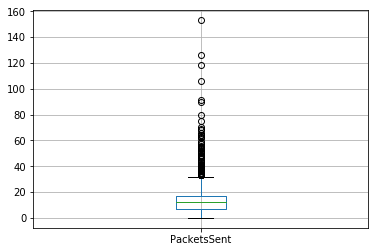

In [0]:
df.boxplot(column=['PacketsSent'])

#### Percentiles

How does are 25%, 50% (median) and 75% percentiles computed?

In [0]:
X = df['PacketsSent'].values
X

array([14, 29, 18, ..., 10, 10, 48])

Order the values

In [0]:
X_sorted = np.sort(X)
X_sorted

array([  0,   0,   0, ..., 118, 126, 153])

Visit the elements and stop when you visited 25% 

In [0]:
K = X_sorted.size
stop = K/100 * 25
print ('stop=',stop)
stop = math.ceil(stop)
print ('stop=',stop)
print('The 25% percentile is ', X_sorted[stop])

stop= 558.0
stop= 558
The 25% percentile is  7


**Meaning**: 25% of the values are $\le$ 8.

#### Outliers

First compute the Inter-Quartile range (range of the box):
    $$ \begin{align}
    \text{IQR} \triangleq 75p - 25p
    \end{align} $$
    

Upper __whisker__ : $\min(75p + 1.5 \cdot \text{IQR}, \max )$

Lower __whisker__ : $\max(25p - 1.5 \cdot \text{IQR}, \min )$

All points outside are considered **outliers**

We can print the box plots of many columns

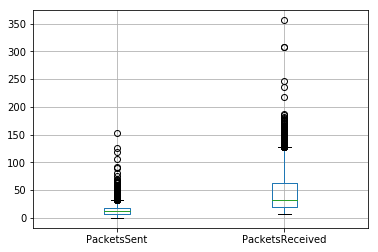

In [0]:
df.boxplot(column=['PacketsSent', 'PacketsReceived'])

We can print boxplots for different values of a column

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd395ba8128>,
      dtype=object)

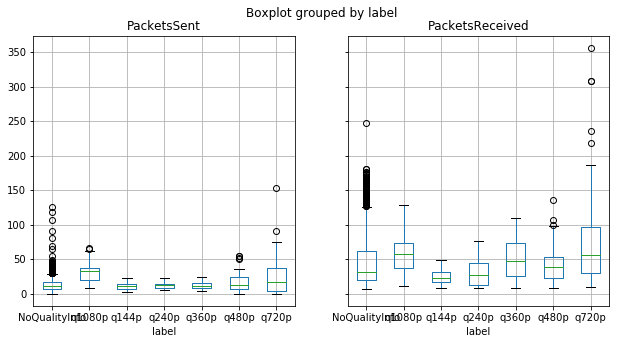

In [0]:
df.boxplot(column=['PacketsSent', 'PacketsReceived'], by="label", figsize=(10,5))

## Histogram 

We can plot the histogram of all the features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd395a6e3c8>,
      dtype=object)

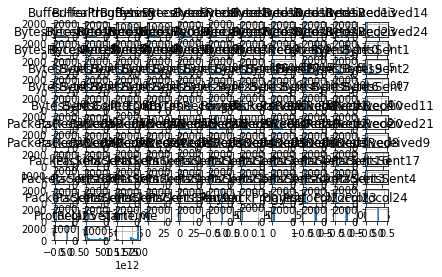

In [0]:
df.hist()

If features are too many, we need to select some

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd3949a4f60>,
      dtype=object)

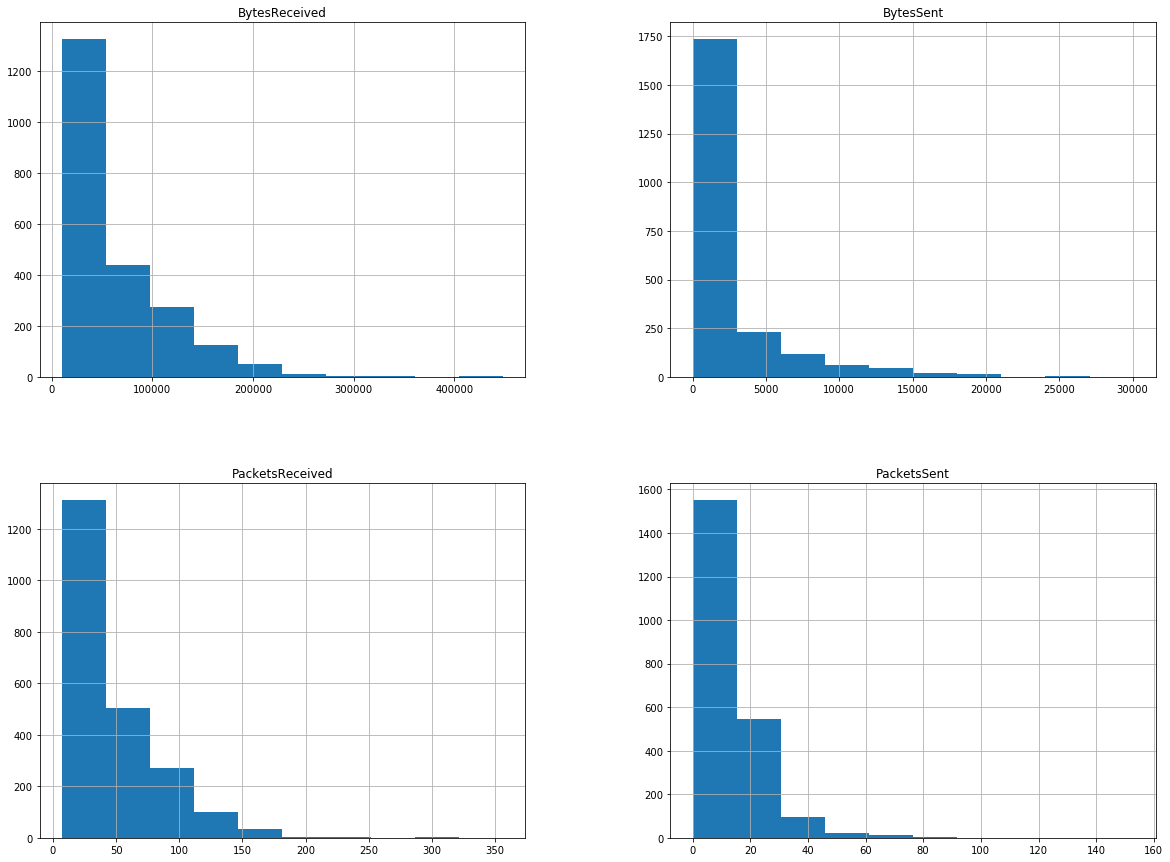

In [0]:
df[['PacketsSent','PacketsReceived','BytesSent','BytesReceived']].hist(figsize=(20,15))

Each column counts the number of samples in the bin.

Histograms are discretized versions of probability density functions.

#### Binning

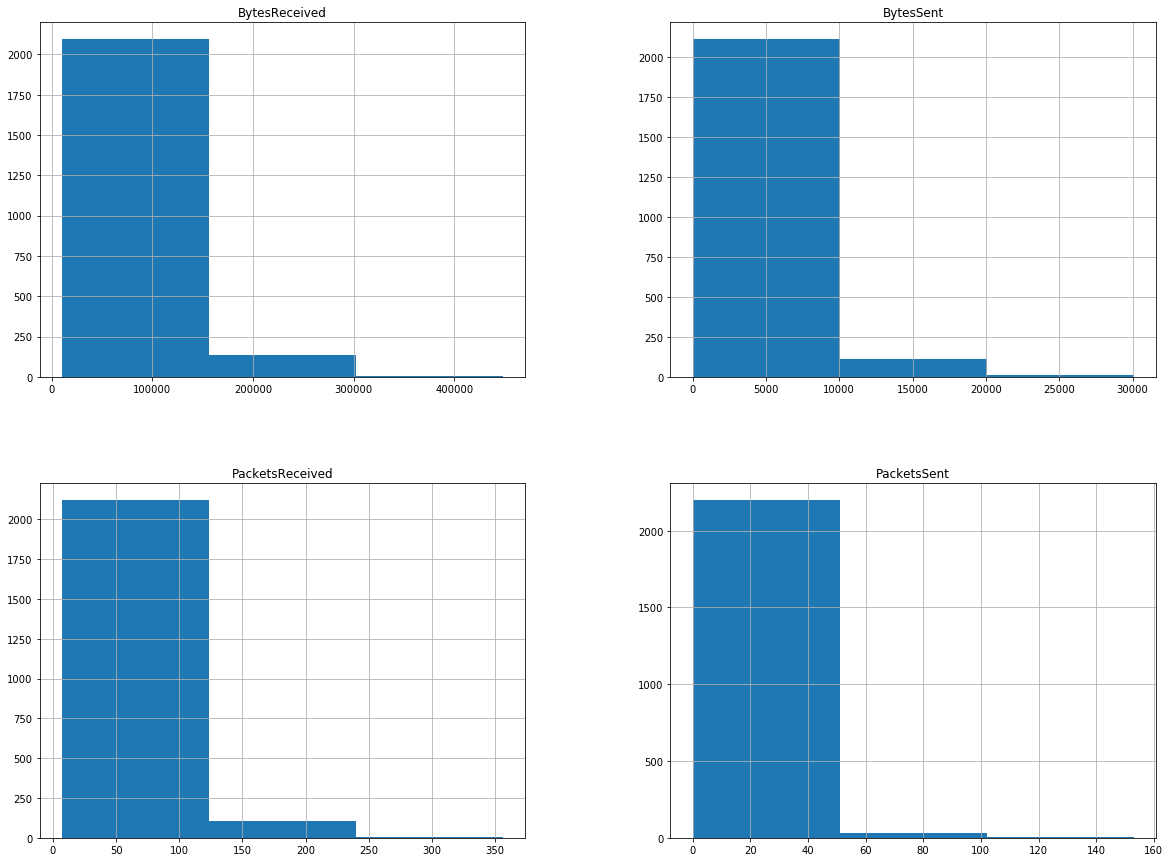

In [0]:
df[['PacketsSent','PacketsReceived','BytesSent','BytesReceived']].hist(bins=3, figsize=(20,15))
plt.show()

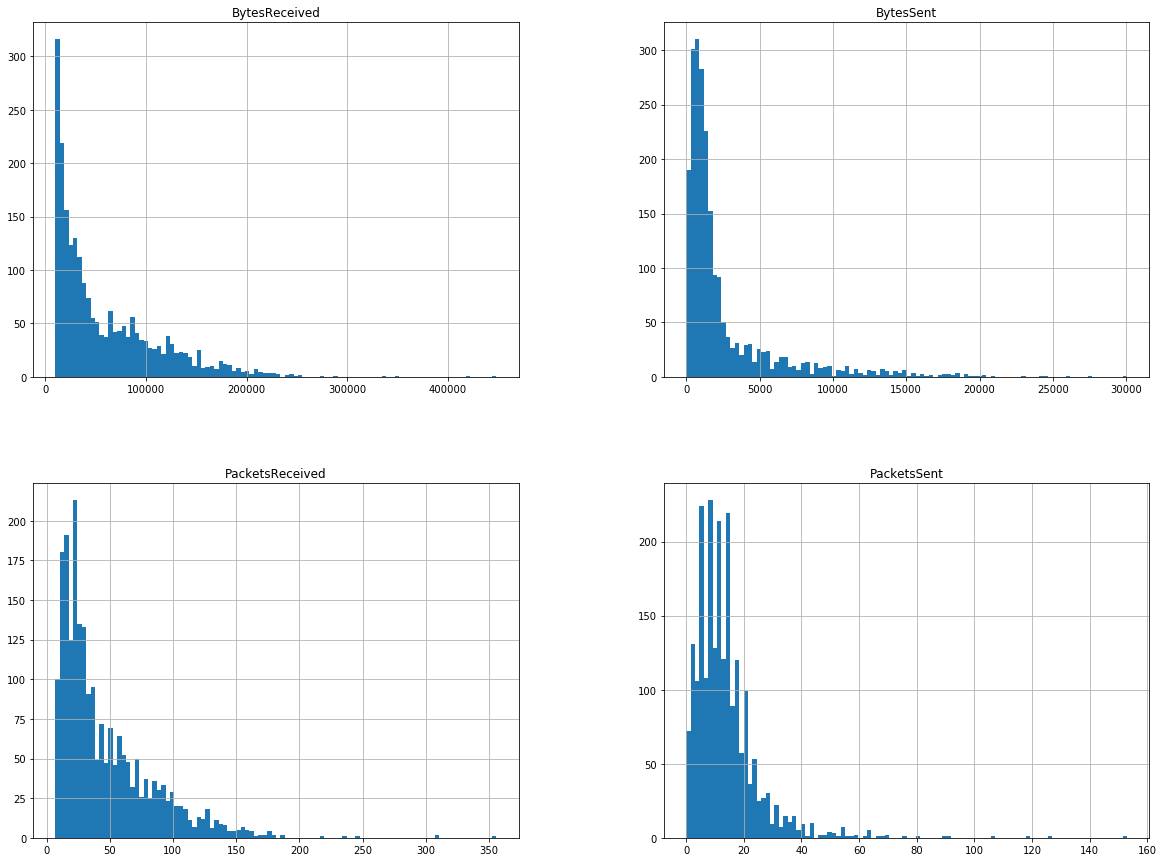

In [0]:
df[['PacketsSent','PacketsReceived','BytesSent','BytesReceived']].hist(bins=100, figsize=(20,15))
plt.show()

How many bins?

If too few the density of the feature is badly approximated (note that with 3 bins we miss the 3 peaks).

If too many, each bin risk to have only 1 or few samples. 

**Rule of thumb**: the more samples, the more bins, since each bin collects a sufficient number of points. Trial and error.

#### Group by
How does the distribution of a feature changes with the quality?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd3945be320>,
      dtype=object)

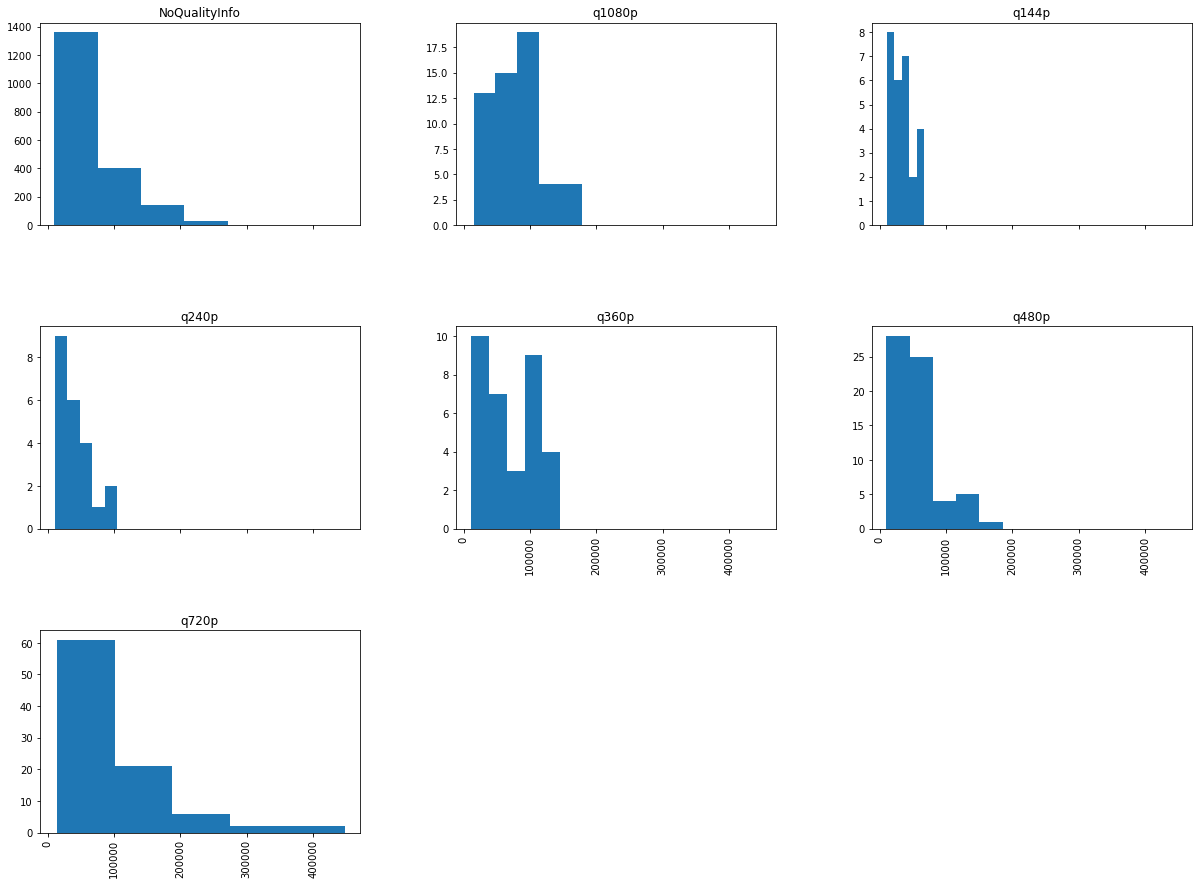

In [0]:
# sharex imposes all the plots to have the same x range 
# (otherwise visual comparison is different).
df[['BytesReceived', 'label']].hist(figsize=(20,15), by='label', 
                                    sharex=True, bins=5)

As expected, the higher the quality, the more ```ReceivedBytes``` concentrate toward higher values. However, we also see that we have not so many samples and we cannot trust the histogram too much.

**Useful for classification**

We can build a simple classifier: ```if BytesReceived >= threshold ==> 720p```

It might be useful to check the distribution of different features

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd393ed2a58>,
      dtype=object)

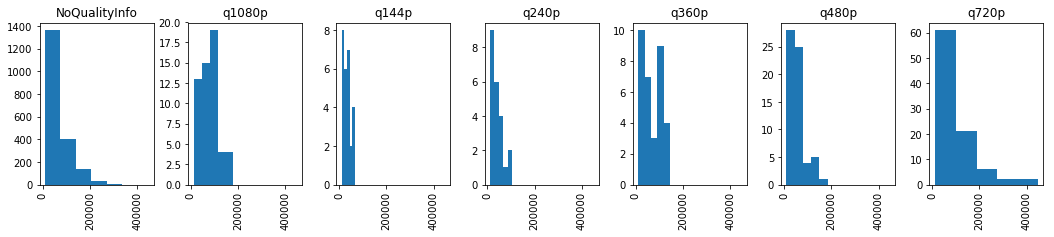

In [0]:
df[['BytesReceived', 'label']].hist(figsize=(20,3), by='label', 
                                    sharex=True, bins=5, layout=(1,8))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd393ad2c18>,
      dtype=object)

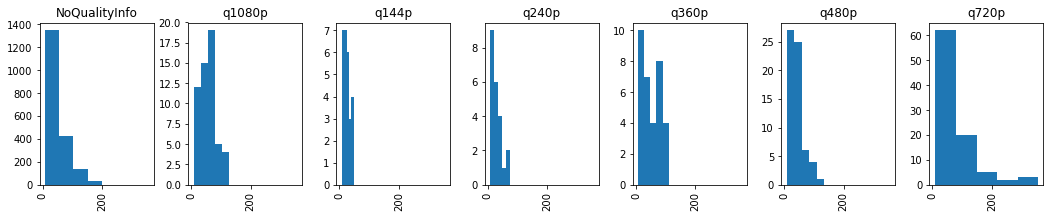

In [0]:
df[['PacketsReceived', 'label']].hist(figsize=(20,3), by='label', 
                                    sharex=True, bins=5, layout=(1,8))

# Correlations

How do feature relate each other?

Use `scatter_matrix`. If the dataset is big, it would take too long. Let just selects few columns. For instance, the overall metrics (not the connection-wise metrics)

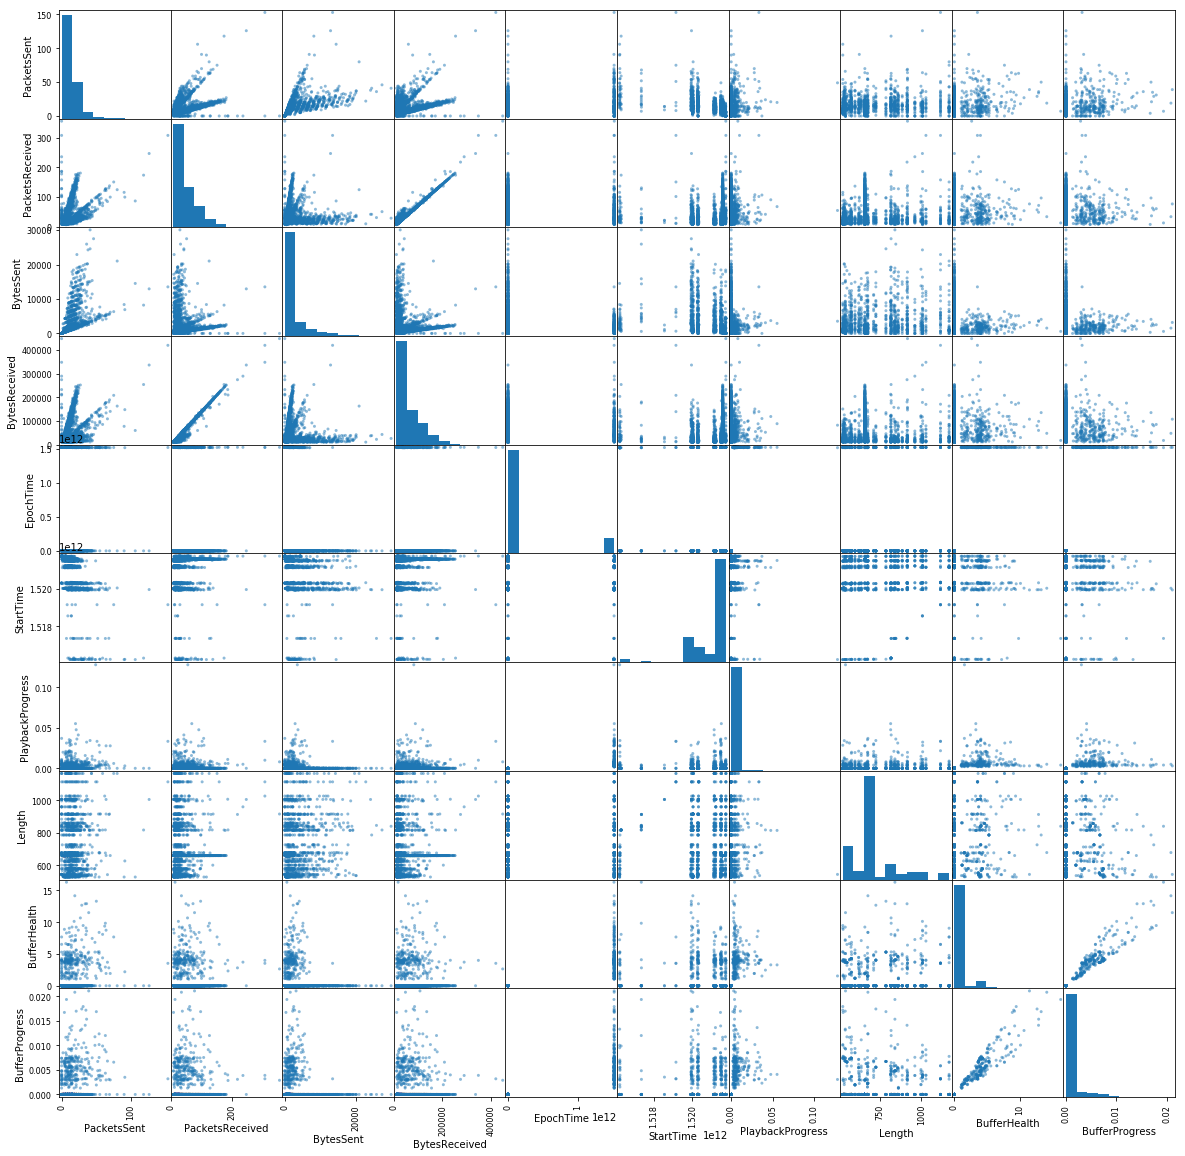

In [0]:
# We first define a function to change the
# rotation of the text in the plot
   

# The following method takes too long
#     sm = scatter_matrix(df)


# Let us just consider some features
columns_to_plot = ['PacketsSent','PacketsReceived',
                       'BytesSent', 'BytesReceived',
                        'EpochTime', 
                        'StartTime', 'PlaybackProgress',
                       'Length', 'BufferHealth', 'BufferProgress',
                       'BufferValid', 'label']
sm = scatter_matrix(df[columns_to_plot],
                   figsize=(20,20))

plt.show()

If we want to rotate labels, I prepared a function in the course library `visualization`

In [0]:
sys.path.insert(0,os.path.abspath('../../course_library') ) # Replace this
                                                            # with the correct
                                                            # path
import visualization

Let's see what is inside the module I prepared

In [0]:
help(visualization)

Help on module visualization:

NAME
    visualization

FUNCTIONS
    plot_corr(df, width, height, print_value, thresh=0)
        Plot a correlation plot
        
        Parameters
        ------------
        df: dataframe
                    The dataframe of which we want to show 
                    the correlation
        width : int
            The width of the figure
        height : int
            The height of the figure            
        print_value : bool
            If True, it prints the Pearson's 
            correlation coefficient values in 
            the picture
        thresh : float
            No color will be shown if the correlation 
            value is below this threshold 
            in absolute value
    
    rotate_labels(sm)
        Rotate the labels of a scatter matrix
        
        Parameters
        -----------------

FILE
    /home/araldo/Dropbox/universita_in_fieri/tsp/teaching/data_science/new-course/NET4550/course_library/visualization.py




In [0]:
visualization.rotate_labels(sm)
plt.show()

Trivial correlations:
* PacketsSent vs. BytesSent
* PacketsReceived vs. BytesReceived
* BufferHealth vs. BufferProgress

Interesting correlations:
* PacketsReceived vs. PacketsSent
*  BufferHealth and BufferProgress are linearly dependent.
    * While we reproduce the video, our ahead-buffer fills more and more

* **BufferProgress**: (fraction of video downloaded into the browser buffer)
* **BufferHealth**: (how many "future seconds" we already have in the buffer)



Unfortunately, `label` is not plotted, since it is not numeric. Let us transform it in numerical form.



In [0]:
# Let us write our replacing function
def replace_function(label_text):
    if label_text=='q1080p':
        return 1080
    elif label_text=='q720p':
        return 720
    elif label_text=='q480p':
        return 480
    elif label_text=='q360p':
        return 360
    elif label_text=='q240p':
        return 240
    elif label_text=='q144p':
        return 144
    else :
        return 0

# Let us apply it, line by line
label_numeric = df['label'].apply(replace_function)

# Let us add this column to our dataframe
df['label_num'] = label_numeric

Let's plot the scatter_matrix again

In [0]:
columns_to_plot.append('label_num')

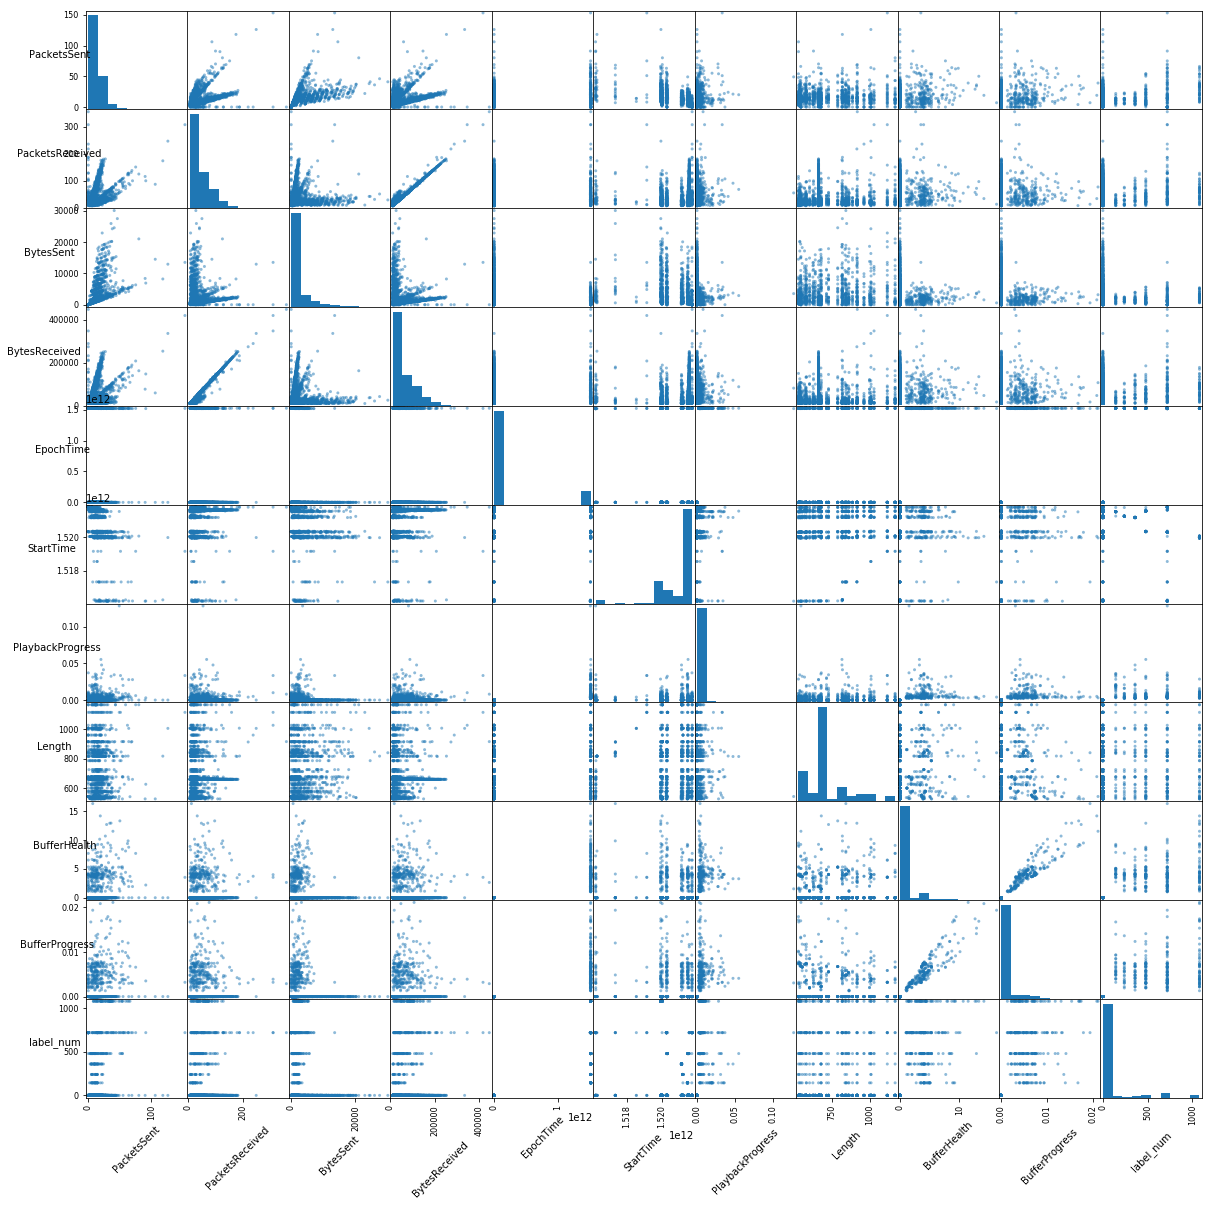

In [0]:
sm = scatter_matrix(df[columns_to_plot],
                   figsize=(20,20))
visualization.rotate_labels(sm)
plt.show()

Note that `label_num=0` for all the samples without quality determined. This is arbitrary and may lead to wrong interpretation. Let us remove those samples and plot again the scatter matrix

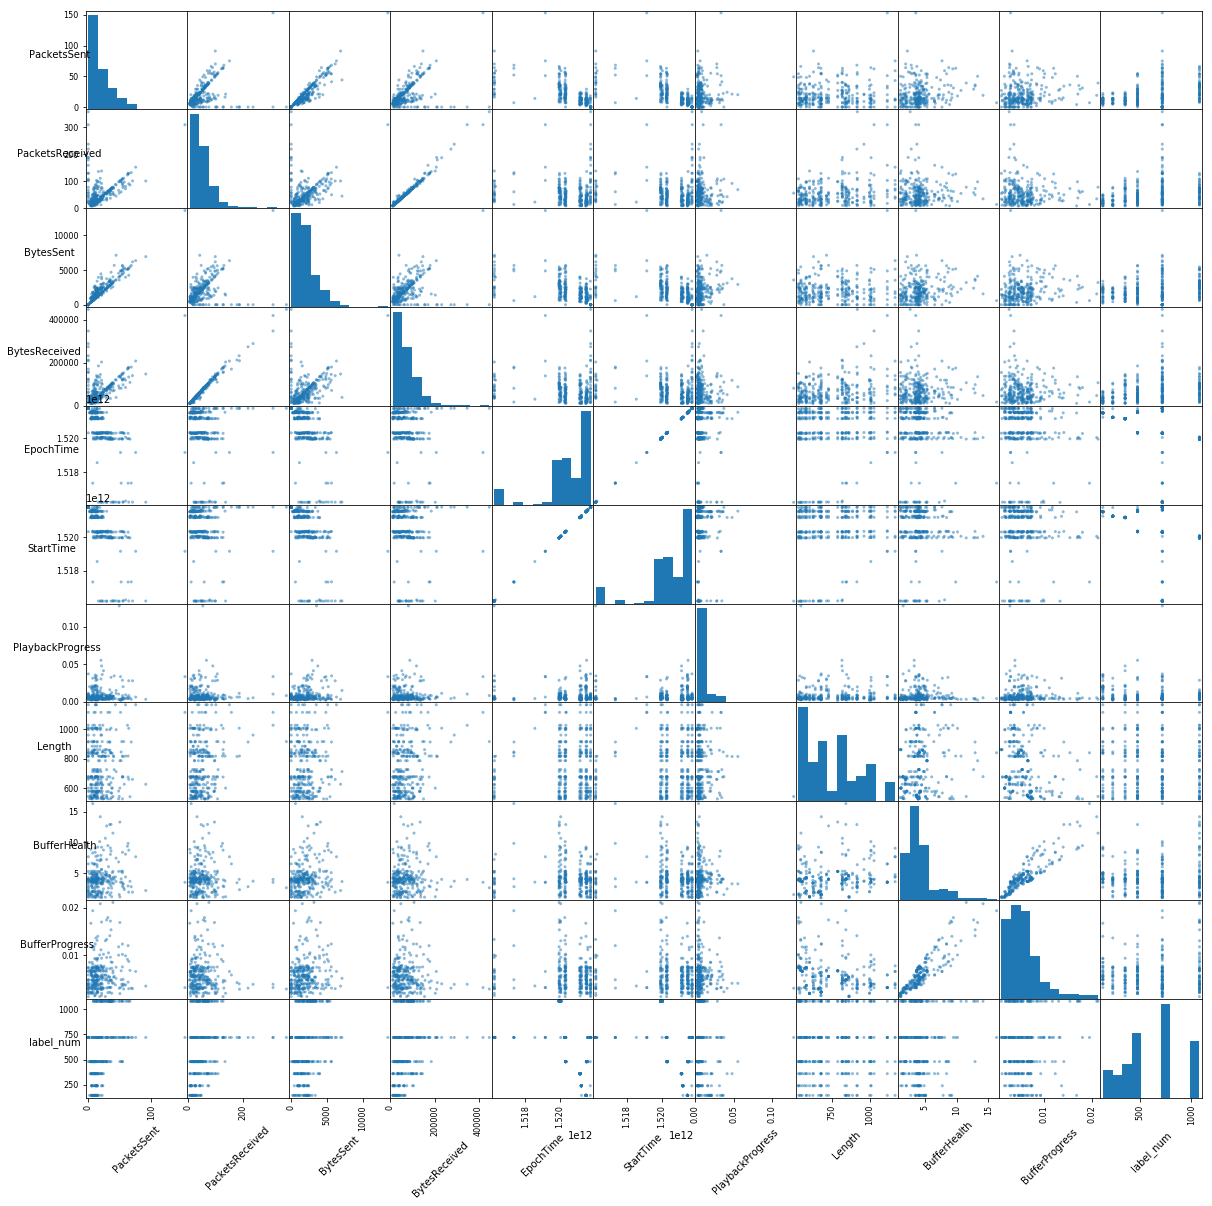

In [0]:
df_cleaned = df[ df['label_num']!= 0 ].copy()

sm = scatter_matrix(df_cleaned[columns_to_plot],
                   figsize=(20,20))
visualization.rotate_labels(sm)

plt.show()

We see that, the more the quality, the more the bytes sent and received.

## Person's correlation

It is a way to mathematically express correlation between two features $j,j'$. For each sample, we compute:
    $$ \begin{align}
    \left( x_j^{(i)} - \mu_j \right) \cdot \left( x_{j'}^{(i)} - \mu_{j'} \right)
    \end{align} $$
    
Averaging across all samples, we obtain the **covariance between features** $j,j'$ ([wikipedia](https://en.wikipedia.org/wiki/Covariance#Calculating_the_sample_covariance))
        $$ \begin{align}
        \text{Cov}(j,j') = 
    \frac{1}{m-1}\sum_{i=1}^m \left( x_j^{(i)} - \mu_j \right) \cdot \left( x_{j'}^{(i)} - \mu_{j'} \right)
    \end{align} $$


We divide by the standard deviation to normalize, and we obtain the **Person's correlation coefficient**
    $$ \begin{align}
    \rho_{j,j'} = \frac{\text{Cov}(j,j')}{\sigma_j\cdot \sigma_{j'}}
    \end{align} $$

It can be shown that
    $$ -1 \le \rho_{j,j'} \le 1
    $$


* Based on the plot above, what do you expect $\rho_{j,j'}$ to be between `PacketsReceived` and `PacketsSent`?

In [0]:
corrmatrix = df_cleaned.corr()
corrmatrix

RelativeTime  PacketsSent  PacketsReceived  BytesSent  \
RelativeTime           1.000000    -0.020187        -0.112497   0.045714   
PacketsSent           -0.020187     1.000000         0.384305   0.934323   
PacketsReceived       -0.112497     0.384305         1.000000   0.322786   
BytesSent              0.045714     0.934323         0.322786   1.000000   
BytesReceived         -0.109761     0.451438         0.991908   0.380027   
PacketsSent0          -0.018677     0.911828         0.408053   0.818403   
PacketsReceived0      -0.046986     0.732565         0.478983   0.686676   
BytesSent0            -0.006109     0.886404         0.402251   0.844003   
BytesReceived0        -0.048810     0.737804         0.478340   0.688929   
PacketsSent1           0.009470     0.162178         0.002959   0.145494   
PacketsReceived1       0.010266     0.127915         0.017745   0.107992   
BytesSent1             0.024404     0.150298        -0.008996   0.153156   
BytesReceived1         0.009384     0.122092         0.021185   0.099145   
PacketsSent2          -0.027950     0.068699        -0.054452   0.103673   
PacketsReceived2      -0.033186     0.029784        -0.076735   0.067779   
BytesSent2            -0.034715     0.051492        -0.063847   0.126079   
BytesReceived2        -0.033227     0.019302        -0.082428   0.055303   
PacketsSent3          -0.034376    -0.033840        -0.135056   0.029663   
PacketsReceived3      -0.034870    -0.023418        -0.101336  -0.009812   
BytesSent3            -0.019191     0.000541        -0.109166   0.142672   
BytesReceived3        -0.029030    -0.046710        -0.097651  -0.053401   
PacketsSent4          -0.036245     0.011856        -0.081209   0.118318   
PacketsReceived4      -0.027444     0.010596        -0.051162   0.059474   
BytesSent4            -0.038609     0.001768        -0.102995   0.180373   
BytesReceived4        -0.023126     0.005650        -0.040609   0.021010   
PacketsSent5           0.273866     0.005801        -0.069375   0.114429   
PacketsReceived5      -0.002314    -0.057715        -0.075332  -0.012598   
BytesSent5             0.603364    -0.008259        -0.061748   0.117272   
BytesReceived5        -0.014617    -0.027429        -0.047326  -0.027612   
PacketsSent6           0.024312     0.029245        -0.056275   0.072764   
...                         ...          ...              ...        ...   
PacketsReceived22           NaN          NaN              NaN        NaN   
BytesSent22                 NaN          NaN              NaN        NaN   
BytesReceived22             NaN          NaN              NaN        NaN   
Protocol23                  NaN          NaN              NaN        NaN   
PacketsSent23               NaN          NaN              NaN        NaN   
PacketsReceived23           NaN          NaN              NaN        NaN   
BytesSent23                 NaN          NaN              NaN        NaN   
BytesReceived23             NaN          NaN              NaN        NaN   
Protocol24                  NaN          NaN              NaN        NaN   
PacketsSent24               NaN          NaN              NaN        NaN   
PacketsReceived24           NaN          NaN              NaN        NaN   
BytesSent24                 NaN          NaN              NaN        NaN   
BytesReceived24             NaN          NaN              NaN        NaN   
Protocol25                  NaN          NaN              NaN        NaN   
PacketsSent25         -0.047293     0.149636         0.056798   0.206924   
PacketsReceived25     -0.078513    -0.255395         0.690489  -0.289026   
BytesSent25           -0.047203     0.147915         0.057275   0.206123   
BytesReceived25       -0.075127    -0.251637         0.692133  -0.285584   
Buffering                   NaN          NaN              NaN        NaN   
Paused                      NaN          NaN              NaN        NaN   
Playing                     NaN          NaN              NaN      

In [0]:
corrmatrix = corrmatrix.round(2)

In [0]:
print("PacketsReceived <-> PacketsSent", 
    corrmatrix['PacketsReceived']['PacketsSent'] )

print("label_num <-> BytesReceived", 
    corrmatrix['label_num']['BytesReceived'] )


print("BytesReceived <-> PacketsReceived", 
    corrmatrix['BytesReceived']['PacketsReceived'] )

PacketsReceived <-> PacketsSent 0.38
label_num <-> BytesReceived 0.26
BytesReceived <-> PacketsReceived 0.99


Based on your knowledge on video streaming, can you explain such correlations?


#### Visualization
In the library `visualization`, I prepared a function to easily visualize correlations. We need to import it:

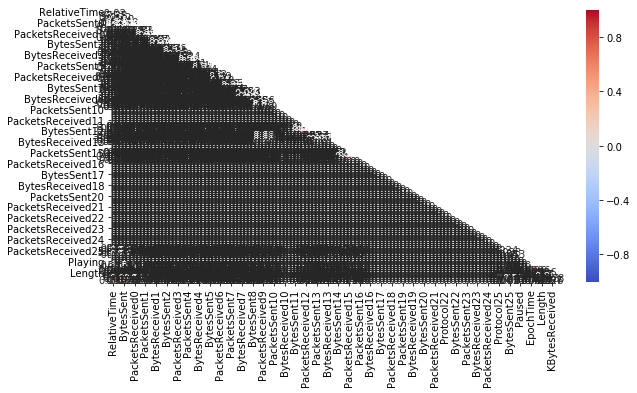

In [0]:
visualization.plot_corr(df_cleaned, width=10, height=5, 
                        print_value=True)

Better not to write the values

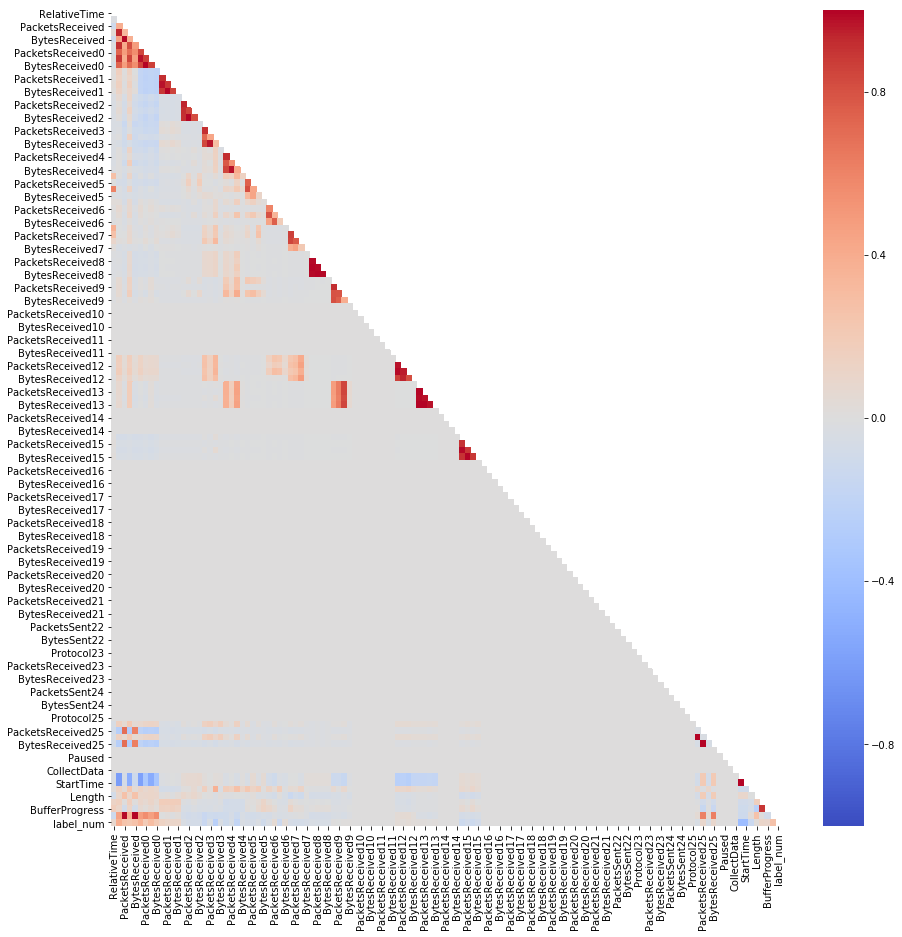

In [0]:
visualization.plot_corr(df_cleaned, width=15, height=15, 
                        print_value=False)

If we focus on `label_num`, it seems that features from `BytesReceived3` to `Protocol25` dot not have a large correlation with `label_num`.

In [0]:
indexOfBytesReceived3=list(df_cleaned.columns).index('BytesReceived3')
indexOfProtocol25=list(df_cleaned.columns).index('Protocol25')

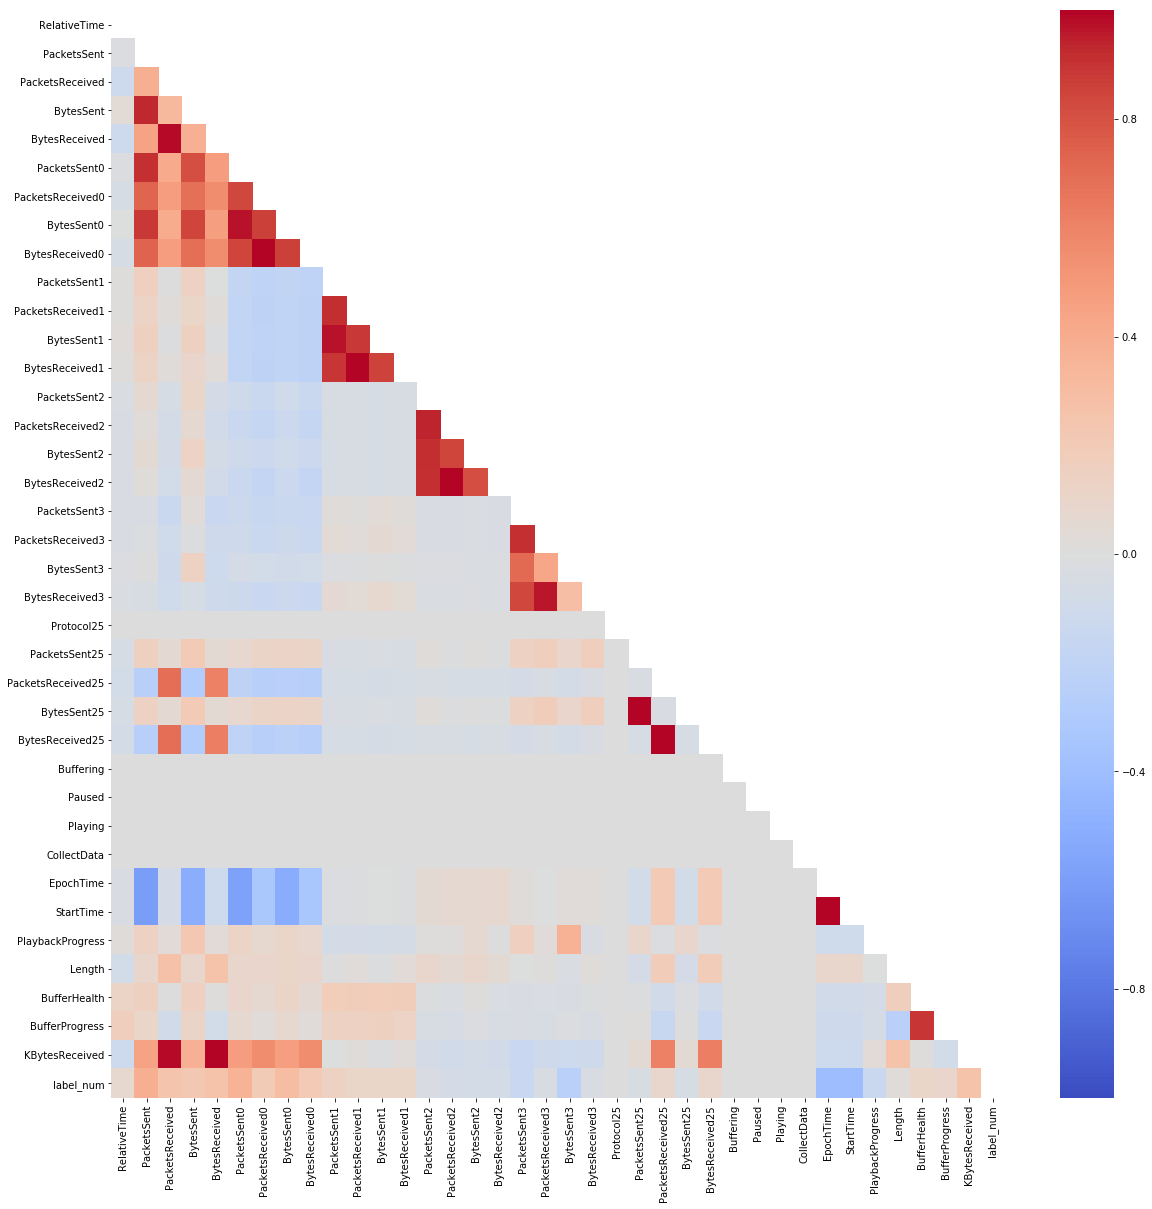

In [0]:
columns_to_focus = df_cleaned.columns[0:indexOfBytesReceived3+1]
columns_to_focus = columns_to_focus.append(df_cleaned.columns[indexOfProtocol25:])

visualization.plot_corr(df_cleaned[columns_to_focus], width=20, height=20, 
                        print_value=False)

#### Feature importance

What are the most correlated features to `label_num`?

In [0]:
# From the course library
import feature_engineering

help(feature_engineering)



Help on module feature_engineering:

NAME
    feature_engineering

FUNCTIONS
    get_features_correlated_to_target(df, target_feature)
        Returns the Pearson's correlation coefficient between the 
        features and the target
        
        Parameters
        ------------
        df_: dataframe
        
        target_feature: string
                the name of the target feature
        
        Returns
        --------------
        Series
                A series of features, with the Person's correlation 
                coefficient between them and the target, ordered in decreasing
                oder of correlation
    
    get_most_correlated(df)
        Returns the pairs of features in descending order of Person's 
        correlation
        
        Parameters
        --------------
        df: dataframe
        
        Returns
        -------------
        Series
                the pair of features and the Pearson's coefficient
    
    low_var_features(df, thre

In [0]:
features_before = \
        feature_engineering.get_features_correlated_to_target(
                df_cleaned, target_feature='label_num')

features_before

label_num            1.00
StartTime           -0.41
EpochTime           -0.41
PacketsSent          0.38
PacketsSent0         0.36
BytesSent0           0.30
BytesReceived        0.26
KBytesReceived       0.26
PacketsReceived      0.25
BytesSent3          -0.23
BytesSent            0.23
BytesReceived0       0.20
PacketsReceived0     0.20
BytesSent4          -0.18
PacketsSent3        -0.15
PacketsSent1         0.14
BytesSent6          -0.13
PlaybackProgress    -0.13
BytesSent15         -0.12
PacketsSent15       -0.12
PacketsReceived1     0.11
BytesReceived1       0.11
PacketsSent4        -0.11
BytesSent1           0.10
BufferHealth         0.10
BufferProgress       0.10
BytesReceived5      -0.10
PacketsReceived15   -0.09
BytesReceived15     -0.09
PacketsReceived25    0.09
                     ... 
BytesSent19           NaN
BytesReceived19       NaN
PacketsSent20         NaN
PacketsReceived20     NaN
BytesSent20           NaN
BytesReceived20       NaN
PacketsSent21         NaN
PacketsRecei

The most correlated feature to the label_num are `StartTime` and `Epoch time`
* `StartTime`: Unix epoch time in milliseconds of the beginning of the experiment
* `EpochTime`: UNIX epoch time in milliseconds of the most recent YouTube API event in the 100-ms interval.

Why these correlations? Would it be correct to use these features? Would these correlations exist in real world?

<details>
<summary>...
    
__Click__
</summary>

The guy who made the experiment first started with high quality videos and then low quality.
    
Correlations of `label_num` with `StartTime` and `EpochTime` are just due to the way the experiment is conducted.
    
We should **NOT USE** them, as in the real world the videos will not be played in the order of quality.
</details>

Explain the correlation of `label_num` with `BytesReceived` and with `PacketsReceived`

<details>
<summary>  ...
    
**Click**
</summary>
    
    The more the quality, the more bytes we need per second. More bytes need to be transported in more IP packets.
</details>

Why those Not a Number (NaN)?

<details>
<summary>  ...
    
**Click**
</summary>
    
    Since those features have standard deviation, which is at the denominator of the Pearson's correlation matrix.
</details>

### LImits of Pearson's correlation

Correlation does not capture all types of dependencies. Suppose you have two features as follows:

In [0]:
invented_df = pd.DataFrame()
invented_df['x'] = np.arange(-10,11,1)
invented_df['y'] = invented_df['x'] * invented_df['x']

invented_df


x    y
0  -10  100
1   -9   81
2   -8   64
3   -7   49
4   -6   36
5   -5   25
6   -4   16
7   -3    9
8   -2    4
9   -1    1
10   0    0
11   1    1
12   2    4
13   3    9
14   4   16
15   5   25
16   6   36
17   7   49
18   8   64
19   9   81
20  10  100

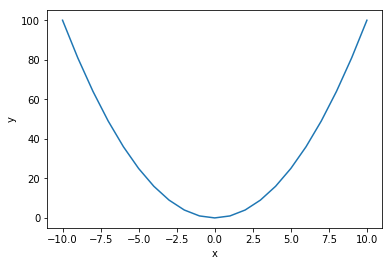

In [0]:
plt.xlabel("x")
plt.ylabel("y")
plt.plot(invented_df['x'], invented_df['y'] )


Is there dependency between `x` and `y`? What is the correlation?

In [0]:
invented_df.corr().round(2)

x    y
x  1.0 -0.0
y -0.0  1.0

If the Pearson's correlation is zero, it does not mean there is no dependency.

Pearson's coefficient only captures monotonic dependency (if one increases the other increases/decreases).

In our case:
* Before 0 => Negative correlation
* After 0 => Positive correlation

But in general
* 0-correlation

### Transformation

Correlations are sometimes unclear, due to the fact that some features may be **skewed** like the following. 

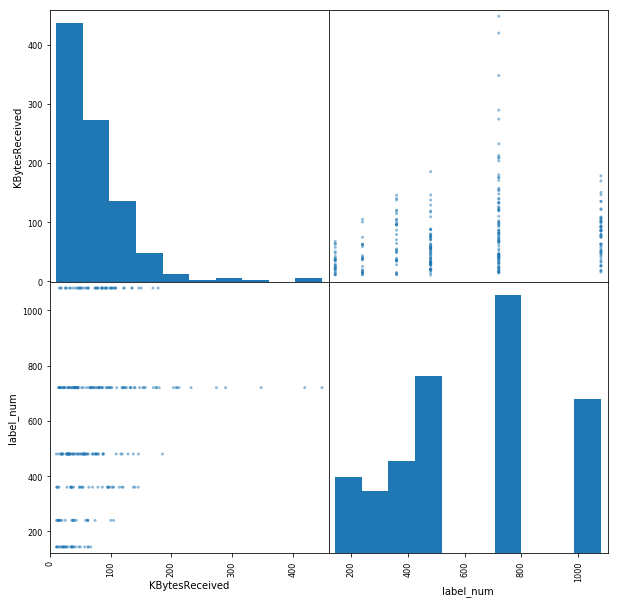

In [0]:
cols = ['KBytesReceived','label_num']
sm = scatter_matrix(df_cleaned[cols],
                   figsize=(10,10))

There are many samples crowded together around low values of `PacketsSent`. We would like to zoom in into those values to discern them.

In [0]:
df_cleaned['KBytesReceived_log'] = np.log(df_cleaned['KBytesReceived'])

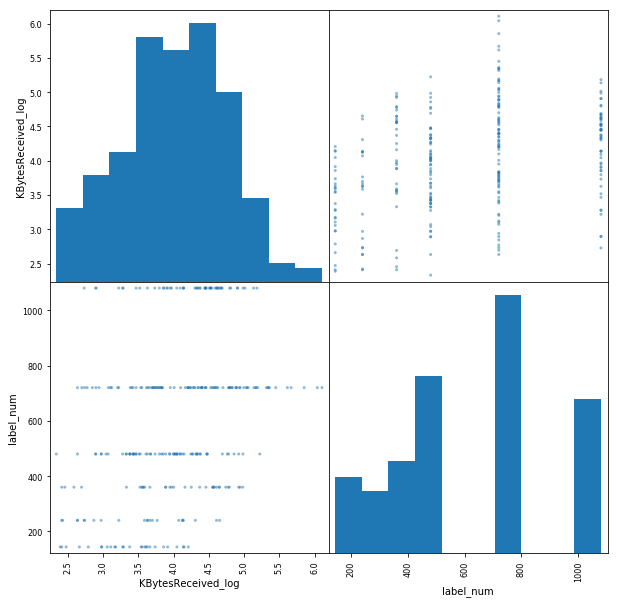

In [0]:
cols = ['KBytesReceived_log','label_num']
sm = scatter_matrix(df_cleaned[cols],
                   figsize=(10,10))

What changed:
* Values of KBytesReceived are better spread
* Looking at `label_num` vs. `KBytesReceived_log`, the values are less squashed down

This let correlation better emerge:

In [0]:
corrmatrix = df_cleaned.corr()
print("Original correlation: ", corrmatrix['KBytesReceived']['label_num'],
     "; Correlation after transformation: ",
     corrmatrix['KBytesReceived_log']['label_num'])

Original correlation:  0.26444253489122005 ; Correlation after transformation:  0.3399134831774235


#### Transform multiple features at a time.

Let's check what are the features that would benefit from log-transformation

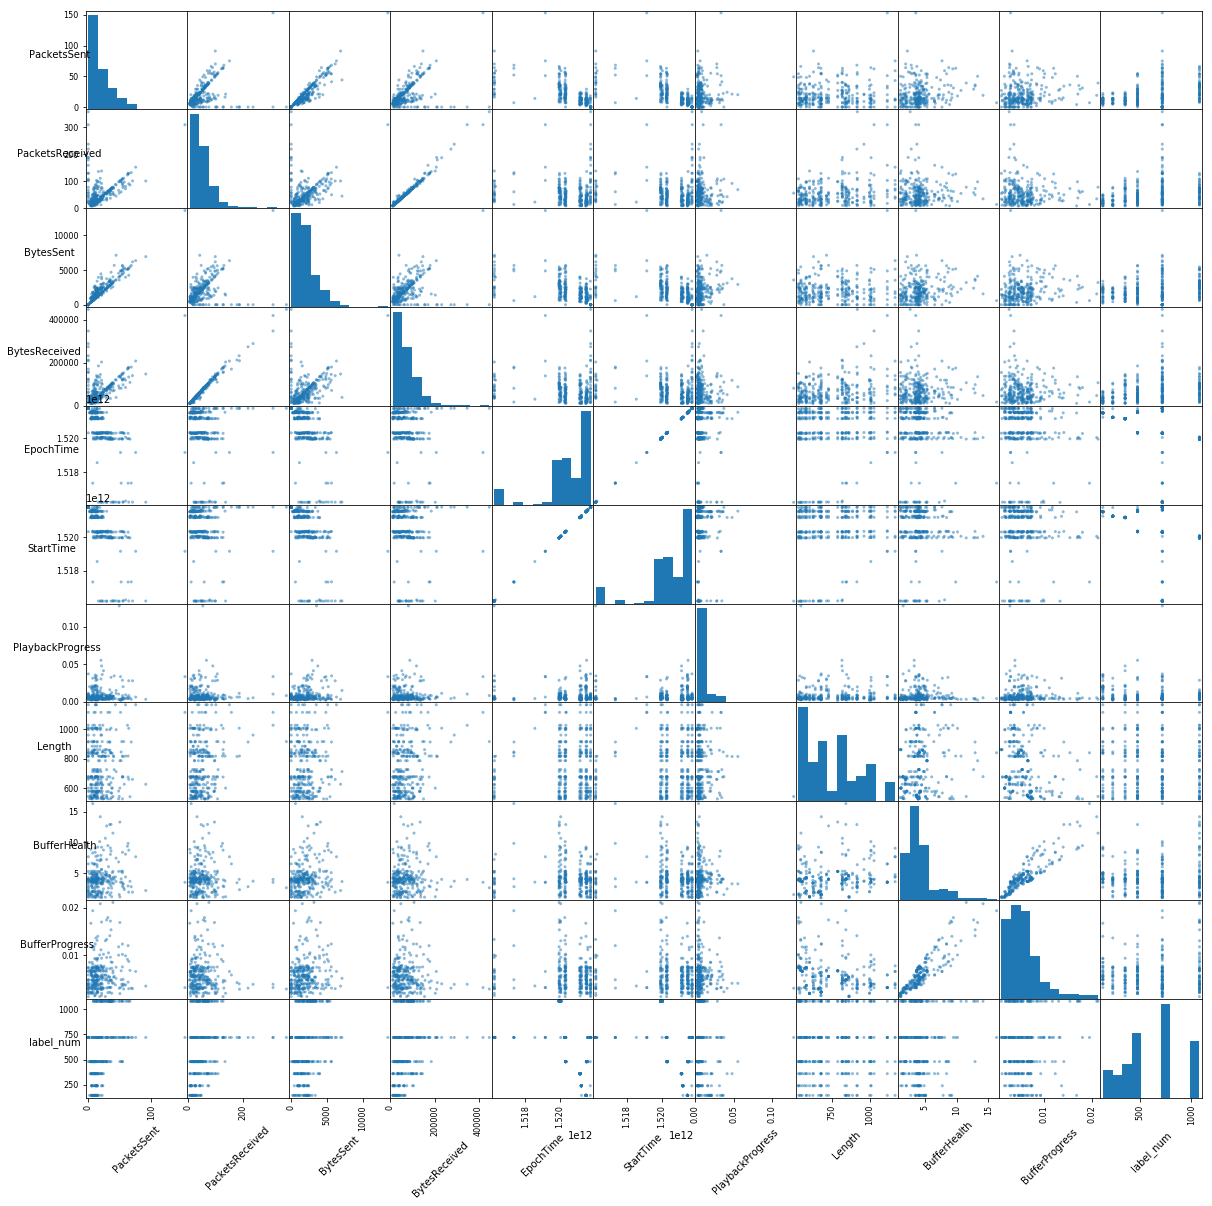

In [0]:
sm = scatter_matrix(df_cleaned[columns_to_plot],
                   figsize=(20,20))
visualization.rotate_labels(sm)

plt.show()

They are 
`PacketsSent`, `PacketsReceived`, `BytesSent`, `BytesReceived`,`BufferProgress`

In [0]:
cols_to_transform = ['PacketsSent','PacketsReceived','BytesSent',
                  'BytesReceived','BufferProgress'];

cols_transformed = [s + "_log" for s in cols_to_transform]


df_cleaned[cols_transformed] = df_cleaned[cols_to_transform].transform(
                        func=lambda x : np.log(x))


/home/araldo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


**Attention**: In effect log(0) is not defined. It's safer to use the transformation log(1+x)

In [0]:
df_cleaned[cols_transformed] = df_cleaned[cols_to_transform].transform(
                        func=lambda x : np.log(1+x))

Let's print again the scattermatrix, replacing the original features with the transformed ones.

In [0]:
columns_to_plot_after_transf = columns_to_plot.copy()
for feature in cols_to_transform:
    columns_to_plot_after_transf.remove(feature)
    
for feature in cols_transformed:
    columns_to_plot_after_transf.insert(0,feature)

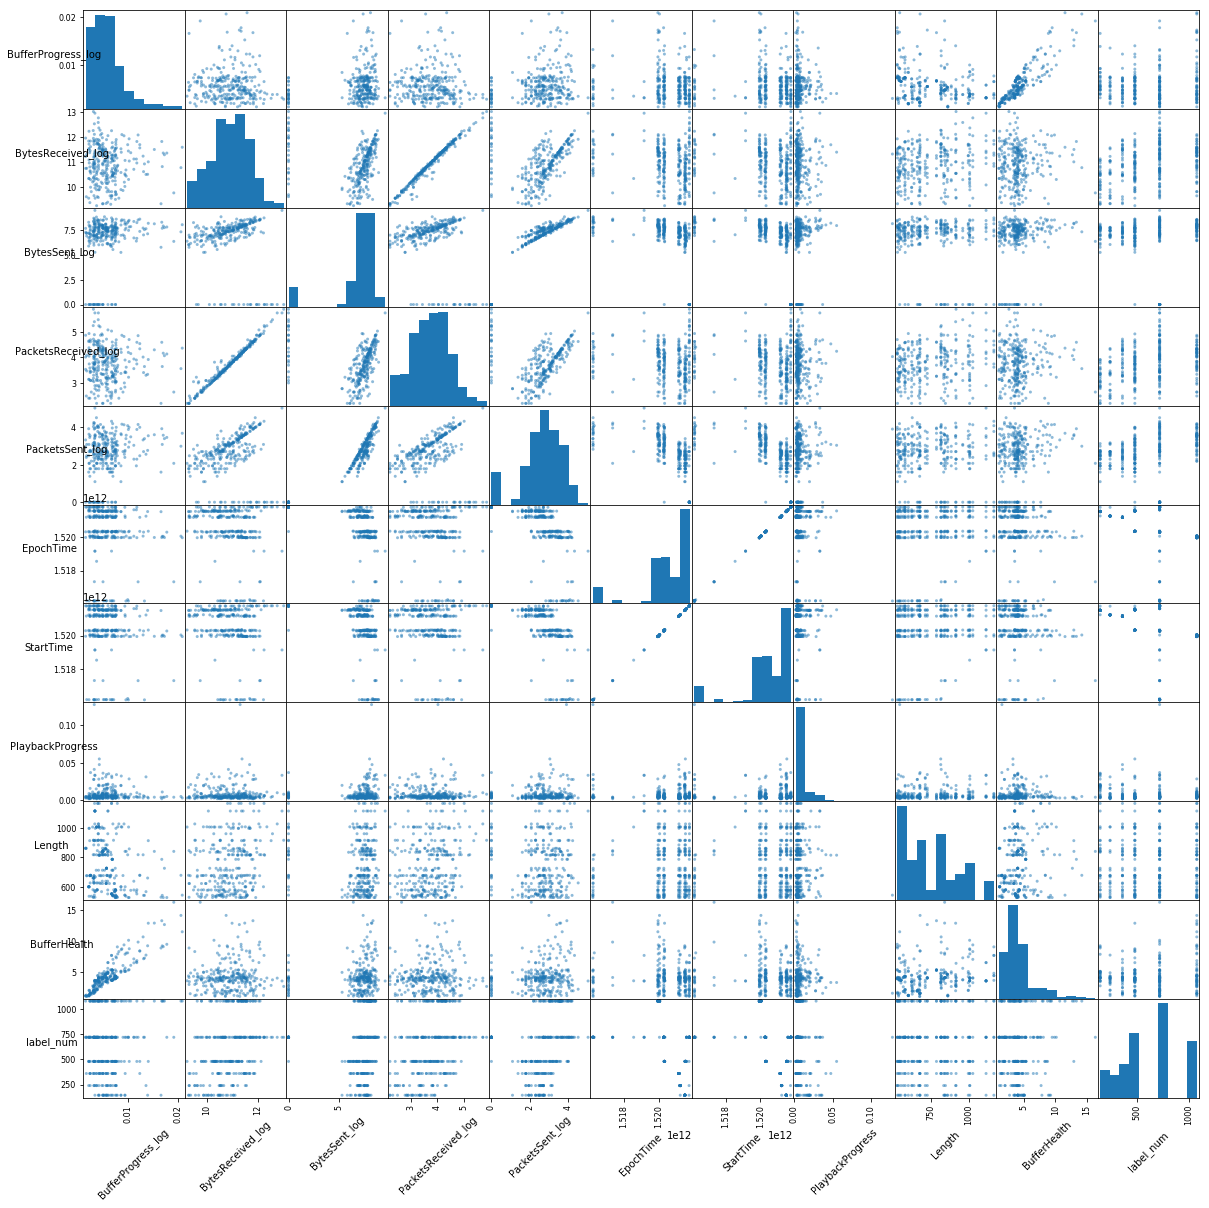

In [0]:
sm = scatter_matrix(df_cleaned[columns_to_plot_after_transf],
                   figsize=(20,20))
visualization.rotate_labels(sm)

plt.show()

Let's check the most correlated features to `label_num`.

In [0]:
feature_engineering.get_features_correlated_to_target(df_cleaned,
                                    target_feature='label_num').head(10)

label_num              1.00
StartTime             -0.41
EpochTime             -0.41
PacketsSent            0.38
PacketsSent0           0.36
PacketsReceived_log    0.34
KBytesReceived_log     0.34
BytesReceived_log      0.34
BytesSent0             0.30
PacketsSent_log        0.26
Name: label_num, dtype: float64

Before adding the transformed features, the most correlated features were

In [0]:
features_before.head(10)

label_num          1.00
StartTime         -0.41
EpochTime         -0.41
PacketsSent        0.38
PacketsSent0       0.36
BytesSent0         0.30
BytesReceived      0.26
KBytesReceived     0.26
PacketsReceived    0.25
BytesSent3        -0.23
Name: label_num, dtype: float64

We have unveiled more correlation in our data than it was before. It will be very useful to produce better models

Experiment with different transformations ([here](https://medium.com/@TheDataGyan/day-8-data-transformation-skewness-normalization-and-much-more-4c144d370e55) and [here](https://medium.com/@ODSC/transforming-skewed-data-for-machine-learning-90e6cc364b0) )

In [0]:
df_cleaned.to_csv(mydatasets_folder +'/video-qoe-processed/df.'+
                  dataset_to_use+'_2.csv',index = None, header=True)

# References

[1] Gutterman, C., Guo, K., Arora, S., Wang, X., Wu, L., Katz-Bassett, E., & Zussman, G. (2019). Requet: Real-time QoE detection for encrypted YouTube traffic. In ACM MMSys.